## Data Preparation

In [4]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical 

In [14]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [15]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [16]:
def process_data(X,Y):
  X = X.reshape((-1,28,28,1))
  X = X/255.0    #normalization
  Y = to_categorical(Y)

  return X,Y

In [17]:
X_train,Y_train = process_data(X_train,Y_train)
X_test,Y_test = process_data(X_test,Y_test)

In [18]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


## Building a Convnet

In [20]:
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
import matplotlib.pyplot as plt

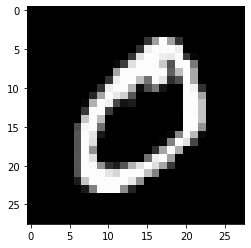

In [23]:
plt.imshow(X_train[1].reshape((28,28)),cmap='gray')
plt.show()

In [31]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))   #No of filters=32
model.add(MaxPool2D(2,2))                                             #Pool size=(2,2) and stride=(2,2)
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))   #No of filters=64
model.add(MaxPool2D(2,2))                                             #Pool size=(2,2) and stride=(2,2)
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))   #No of filters=64
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [32]:
model.compile(loss='categorical_crossentropy',metrics='accuracy',optimizer='adam')

In [33]:
model.fit(X_train,Y_train,epochs=20,batch_size=128,validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 46s 107ms/step - loss: 0.2691 - accuracy: 0.9211 - val_loss: 0.0689 - val_accuracy: 0.9797
Epoch 2/20
422/422 [==============================] - 45s 106ms/step - loss: 0.0624 - accuracy: 0.9800 - val_loss: 0.0470 - val_accuracy: 0.9862
Epoch 3/20
422/422 [==============================] - 45s 106ms/step - loss: 0.0433 - accuracy: 0.9862 - val_loss: 0.0487 - val_accuracy: 0.9867
Epoch 4/20
422/422 [==============================] - 44s 105ms/step - loss: 0.0340 - accuracy: 0.9889 - val_loss: 0.0403 - val_accuracy: 0.9885
Epoch 5/20
422/422 [==============================] - 44s 104ms/step - loss: 0.0271 - accuracy: 0.9914 - val_loss: 0.0344 - val_accuracy: 0.9898
Epoch 6/20
422/422 [==============================] - 45s 106ms/step - loss: 0.0227 - accuracy: 0.9924 - val_loss: 0.0372 - val_accuracy: 0.9902
Epoch 7/20
422/422 [==============================] - 45s 106ms/step - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.0325 - val_ac

In [44]:
model.evaluate(X_test,Y_test)                        ##Getting ~99% accuracy on testing data 

313/313 [==============================] - 3s 11ms/step - loss: 0.0387 - accuracy: 0.9899


[0.038706518709659576, 0.9898999929428101]